# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
train_cols = set(data.columns)-set(['Outcome'])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(data[train_cols],data['Outcome'],test_size=0.2,random_state=2020)

In [5]:
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=2020)

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(614, 8)
(77, 8)
(77, 8)


In [7]:
k_vals = [1,3,5,9,11,15,17,25,41,61]
val_acc = []

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    val_acc.append(np.sum(model.predict(X_val)==y_val)/len(y_val))
    
print("Validation Accuracies :")
display(pd.DataFrame({'k-value':k_vals,'val_acc':val_acc}))

Validation Accuracies :


,k-value,val_acc
0,1,0.714286
1,3,0.753247
2,5,0.701299
3,9,0.766234
4,11,0.766234
5,15,0.766234
6,17,0.766234
7,25,0.727273
8,41,0.727273
9,61,0.727273


In [8]:
best_k = k_vals[val_acc.index(max(val_acc))]
print("k value of Model with best validation accuracy =",best_k)

k value of Model with best validation accuracy = 9


In [9]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train,y_train)
test_acc = np.sum(model.predict(X_test)==y_test)/len(y_test)
print("Test Accuracy =",test_acc)

Test Accuracy = 0.7792207792207793


- From the validation accuracies, we can see that validation accuracy increases initially, becomes constance and finally starts decreases to a constant value

- We are choosing the model with lowest k value in the list of validation accuracy since the computation time will be less.

- The mode with best validation accuracy has the validation accuracy = 0.766 and its corresponding test accuracy = 0.779

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. **Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



In [10]:
X,y = load_digits(return_X_y=True)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2020)

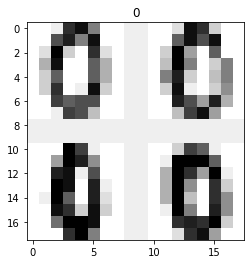

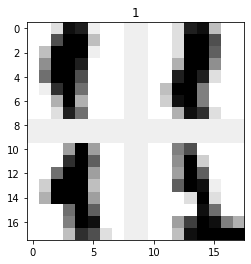

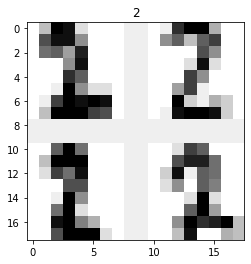

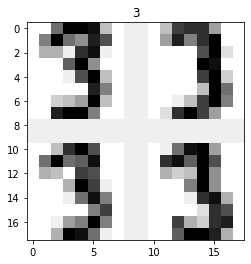

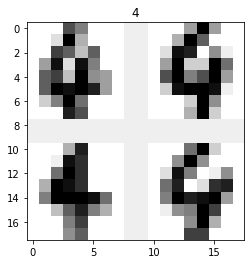

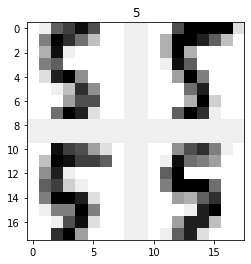

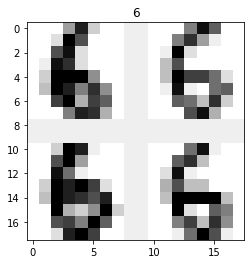

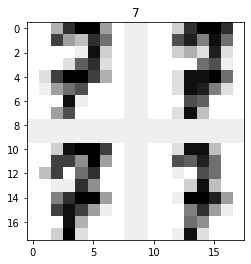

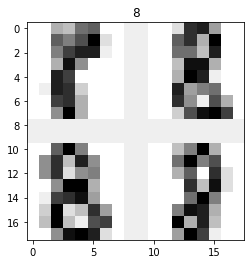

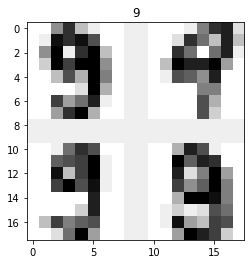

In [12]:
# Visualizing the dataset :

df = pd.DataFrame({'X':[i for i in X_train],'y':y_train}).groupby('y').sample(4)['X'].values

for i in range(0,4*10,4):
    x_1 = df[i].reshape(8,8)
    x_2 = df[i+1].reshape(8,8)
    x_3 = df[i+2].reshape(8,8)
    x_4 = df[i+3].reshape(8,8)
    im = np.row_stack([np.column_stack([x_1,np.ones((8,2)),x_2]),np.ones((2,18)),np.column_stack([x_3,np.ones((8,2)),x_4])])
    plt.title(str(i//4))
    plt.imshow(im,cmap=plt.cm.gray_r)
    plt.show()

In [12]:
# Gaussian

gaussian_model = GaussianNB()

gaussian_model.fit(X_train,y_train)

print("Train Accuracy :",gaussian_model.score(X_train,y_train))
print("Test Accuracy :",gaussian_model.score(X_test,y_test))

Train Accuracy : 0.8594293667362561
Test Accuracy : 0.825


In [13]:
# Bernoulli

bernoulli_model = BernoulliNB()

bernoulli_model.fit(X_train,y_train)

print("Train Accuracy :",bernoulli_model.score(X_train,y_train))
print("Test Accuracy :",bernoulli_model.score(X_test,y_test))

Train Accuracy : 0.8622129436325678
Test Accuracy : 0.8555555555555555


In [14]:
# Testing F1 score

g_f1_score = f1_score(y_test,gaussian_model.predict(X_test),average="micro")
b_f1_score = f1_score(y_test,bernoulli_model.predict(X_test),average="micro")

print("Gaussian Model F1 Score =",g_f1_score)
print("Bernoulli Model F1 Score =",b_f1_score)

Gaussian Model F1 Score = 0.825
Bernoulli Model F1 Score = 0.8555555555555555


In [15]:
# Testing Confusion Matrix

g_c_m = confusion_matrix(y_test,gaussian_model.predict(X_test))
b_c_m = confusion_matrix(y_test,bernoulli_model.predict(X_test))

Gaussian Model Confusion Matrix =


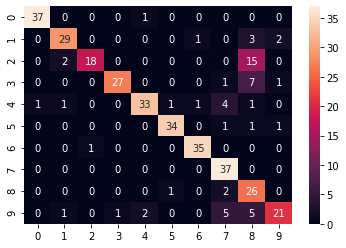

In [16]:
print("Gaussian Model Confusion Matrix =")
sns.heatmap(g_c_m,annot=True)
plt.show()

Bernoulli Model Confusion Matrix =


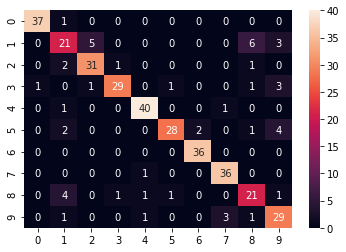

In [17]:
print("Bernoulli Model Confusion Matrix =")
sns.heatmap(b_c_m,annot=True)
plt.show()

- We see that Bernoulli prior gives better training accuracy, better F1 score and better Confusion Matrix as compared to the Gaussian prior.

- The most probable inference from the above result is that the probability distribution of the digit set is better considered as discrete rather than continuous.

- Most of the numbers (like 2 and 3) have been majorly confused with 8 mainly.